# Classification - Supervised Machine Learning
## Bank Marketing Effectiveness Prediction - MySQL Workbench

## Probleam Statement:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).

## Data Description:
- age: age of client (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- balance: Account balance of client
- day: last contact day of the month
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- y (target Variable) - has the client subscribed a term deposit? (binary: 'yes','no')

## Agenda:
1. Importing Dependencies
2. Importing & Loading Data from MySQL Workbentch to Python
3. Basic Information About Data
4. Understanding Variables
5. Data Wrangling & Feature Engineering
    - Handling Duplicates
    - Handling Null Values
    - Handling Outliers
6. Exploratory Data Analysis
    - Univariate Analysis
    - Bivariate Analysis
    - Multivariate Analysis
7. Data Preprocessing
    - Categorical Encoding
    - Separating dependent & independent features
    - Feature Selection
    - Handling Imbalanced Data
    - Data Splitting
    - Data Scaling
8. ML Model Implementation
    - DEcision Tree
    - Random Forest
9. End of Document

## 1. Importing Dependencies

In [1]:
## Importing necessary libraries

# For scientific computation and processing array elements.
import numpy as np
from scipy.stats import norm

# Importing pandas
import pandas as pd

# For plotting statstical visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For pretty-printing tabular data
from tabulate import tabulate

# For plotting feature importance
from sklearn.feature_selection import mutual_info_classif

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# For Split dataset into train and test
from sklearn.model_selection import train_test_split

# For Cross-Validation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# For Scaliing dataset
from sklearn.preprocessing import MinMaxScaler

# Importing algorithams for building model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# For plotting Decision Tree
from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree
# from IPython.display import SVG
# from IPython.display import display

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Importing & Loading Data from MySQL Workbentch to Python

In [2]:
import pandas as pd
import mysql.connector as mysql

# Connect to the MySQL database
db = mysql.connect(
    host="localhost",
    user="root",
    password="12345",
    database="bank_marketing"
)

# Create a cursor
cursor = db.cursor()

# Replace 'your_table_name' with your actual table name
table_name = 'bank-full'

# Execute a SELECT query to retrieve the entire data from the table
query = f"SELECT * FROM `{table_name}`"
cursor.execute(query)

# Fetch all the rows from the last executed statement
table_data = cursor.fetchall()

# Get column names from the cursor description
columns = [i[0] for i in cursor.description]

# Create a Pandas DataFrame
df = pd.DataFrame(table_data, columns=columns)


In [3]:
# Display the DataFrame
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6688,29,blue-collar,married,primary,no,1101,yes,yes,unknown,28,may,165,1,-1,0,unknown,no
11936,41,blue-collar,divorced,primary,no,1498,no,no,unknown,20,jun,10,2,-1,0,unknown,no
35355,37,management,single,tertiary,no,815,yes,no,cellular,7,may,77,1,-1,0,unknown,no
31677,26,self-employed,single,secondary,no,3676,no,no,cellular,7,apr,148,1,-1,0,unknown,yes
14886,58,blue-collar,married,primary,no,0,no,no,telephone,16,jul,558,6,-1,0,unknown,no


In [4]:
# First Five Observations
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Last five observations
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## 3. Basic Information About Data

In [6]:
# Checking shape of the dataset
df.shape

(45211, 17)

##### Observation:
Dataset having 45211 observations and 17 columns

In [7]:
# Checking columns name of dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- In the dataset, there are object, float64, and int64 dtypes features present.

In [9]:
# Bsic description of Dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [10]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [11]:
# Checking for number of null values in dataset
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum()})
count_null_df.set_index('columns').sort_values(by='number_of_nulls_values', ascending = False)

,number_of_nulls_values
columns,
age,0
day,0
poutcome,0
previous,0
pdays,0
campaign,0
duration,0
month,0
contact,0


##### <b><u>Observations :
- **Dataset having 45211 observations and 17 columns.**
- **In the dataset, there are object, float64, and int64 dtypes features present.**
- **Dataset having 0 duplicated values.**
- **There are no null/missing values in the dataset.**

## 4. Understanding Variables

In [12]:
# Basic description of Dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [13]:
# Finding categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 10 categorical variables
------------------------------------------------------------------------------------------
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [14]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*45)
print(numerical_variables)

There are 7 numerical variables
------------------------------------------------------------------------------------------
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [15]:
# Check Unique Values and its frequency for each variable
for var in df.columns:
    print(df[var].value_counts())
    print('--'*45)

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
------------------------------------------------------------------------------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
------------------------------------------------------------------------------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
------------------------------------------------------------------------------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
------------------------------------------------------------------------------------------
no 

<b><u>Observations :</u><b>
- job, marital, education, default, housing, loan, contact, month, poutcome, and y are among the 10 categorical variables in this dataset.
- There are 7 numerical variables in this dataset: age, balance, day, duration, campaign, pdays, and previous.
- The unknown values for features job, education, contact, and poutcome are 288; 1857; 13020; and 36959, respectively. Unknown values can be treated as null since they are not defined and can be taken out of features by treatment.

## 5. Data Wrangling and Feature Engineering

#### ***[1] <u> Handling Duplicate Values</u>***

In [16]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


#### ***[2] <u> Handling Null / Missing Values</u>***

In [17]:
# Replacing the unknown values with null across all the dataset
df = df.replace('unknown', np.nan)

In [18]:
# Checking for number of null values
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum(),'percentage_null_values':round(df.isna().sum()*100/len(df),2)})
count_null_df.set_index('columns').sort_values(by='percentage_null_values', ascending = False)

,number_of_nulls_values,percentage_null_values
columns,,
poutcome,36959,81.75
contact,13020,28.80
education,1857,4.11
job,288,0.64
month,0,0.00
previous,0,0.00
pdays,0,0.00
campaign,0,0.00
duration,0,0.00


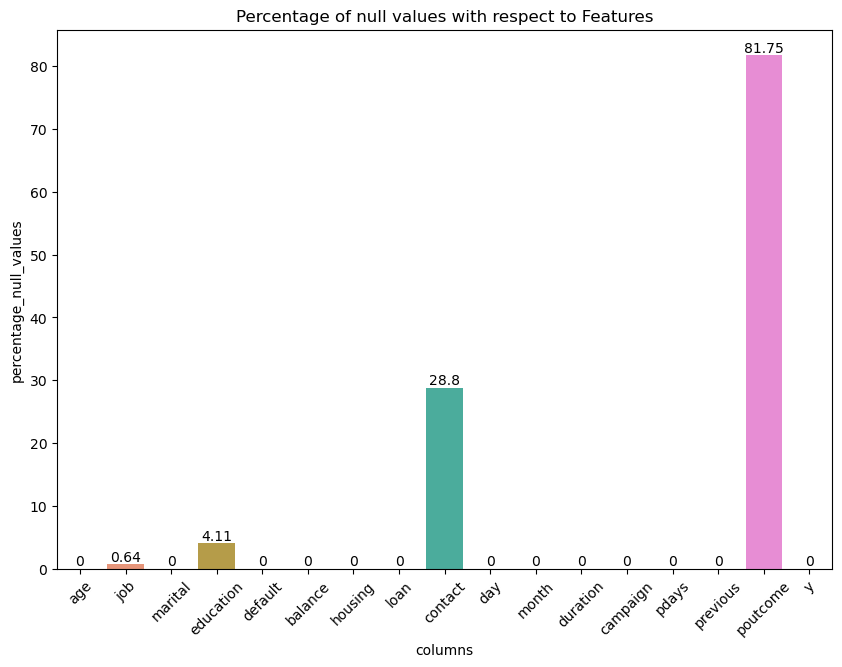

In [19]:
# Ploting number of null values with its variable
plt.figure(figsize=(10,7))
ax=sns.barplot(x='columns', y='percentage_null_values', data=count_null_df)
ax.bar_label(ax.containers[0])
plt.title('Percentage of null values with respect to Features')
plt.xticks(rotation= 45)
plt.show()

- The null values for poutcome, contact, education, and job are 81.75%, 28.80%, 4.11%, and 0.64%, respectively. 

In [20]:
#checking category of features whoes having null values

# Defining target variables
null_variables=['poutcome','contact','education','job']
# Checking categories in each target feature
for var in null_variables:
    print(df[var].value_counts())
    print('--'*45)

failure    4901
other      1840
success    1511
Name: poutcome, dtype: int64
------------------------------------------------------------------------------------------
cellular     29285
telephone     2906
Name: contact, dtype: int64
------------------------------------------------------------------------------------------
secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64
------------------------------------------------------------------------------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64
------------------------------------------------------------------------------------------


In [21]:
# Dropping variables having more than 50% null values
df.drop(columns='poutcome', inplace=True)

# Replacing null values with the most frequent value in a variable
df['contact']=df['contact'].fillna(df['contact'].mode()[0])
df['education']=df['education'].fillna(df['education'].mode()[0])
df['job']=df['job'].fillna(df['job'].mode()[0])

In [22]:
# Verify for null values are removed
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [23]:
# Nullfree shape of dataset
df.shape

(45211, 16)

- Replaced null values for features like contact, education, and job with their modes. In addition, removed features with more than 50% null values because they were worthless and hindered model performance.

#### ***[3] <u>Handling Outliers</u>***

__________________________________________________________________________________________


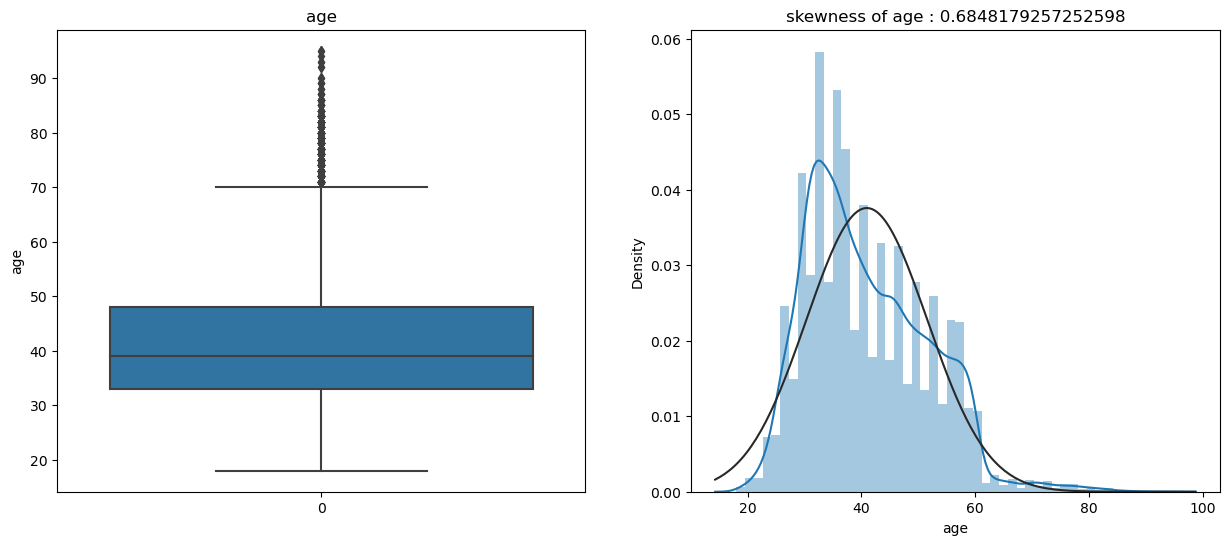

__________________________________________________________________________________________


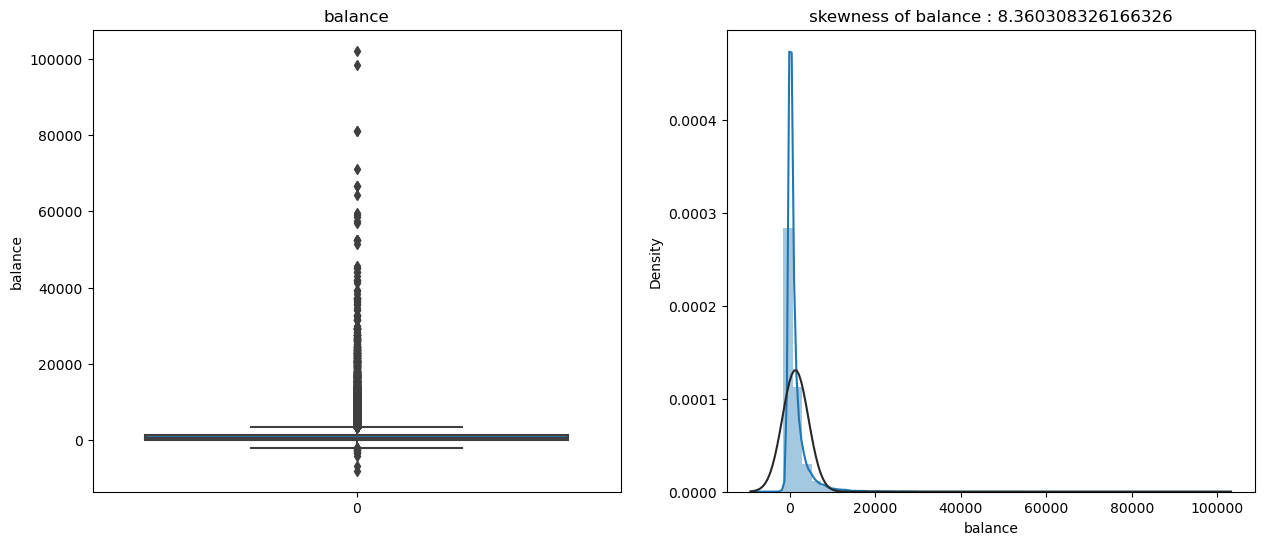

__________________________________________________________________________________________


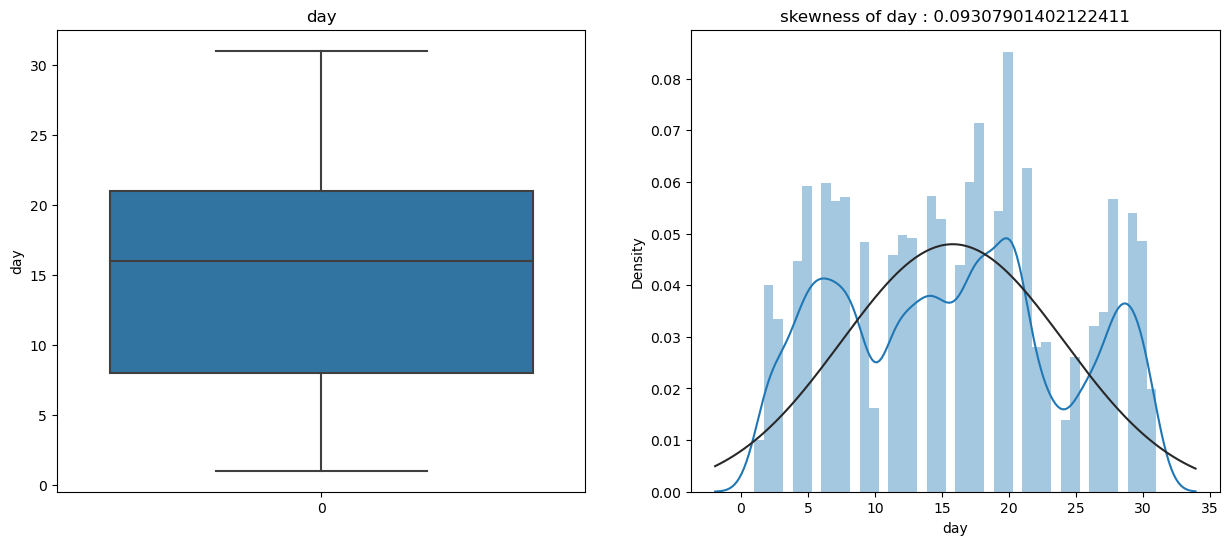

__________________________________________________________________________________________


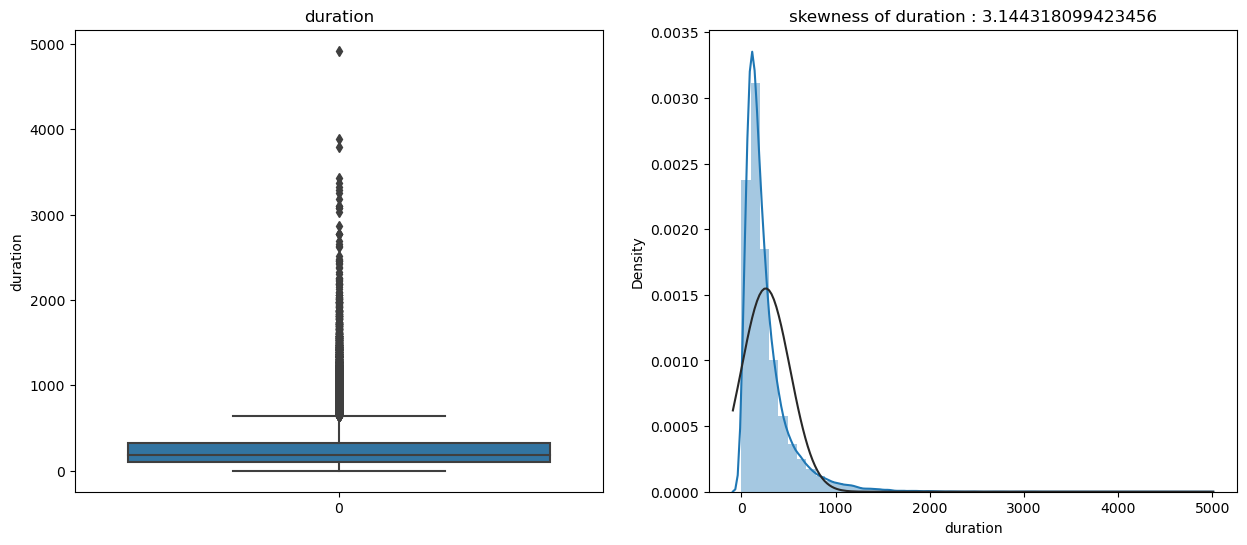

__________________________________________________________________________________________


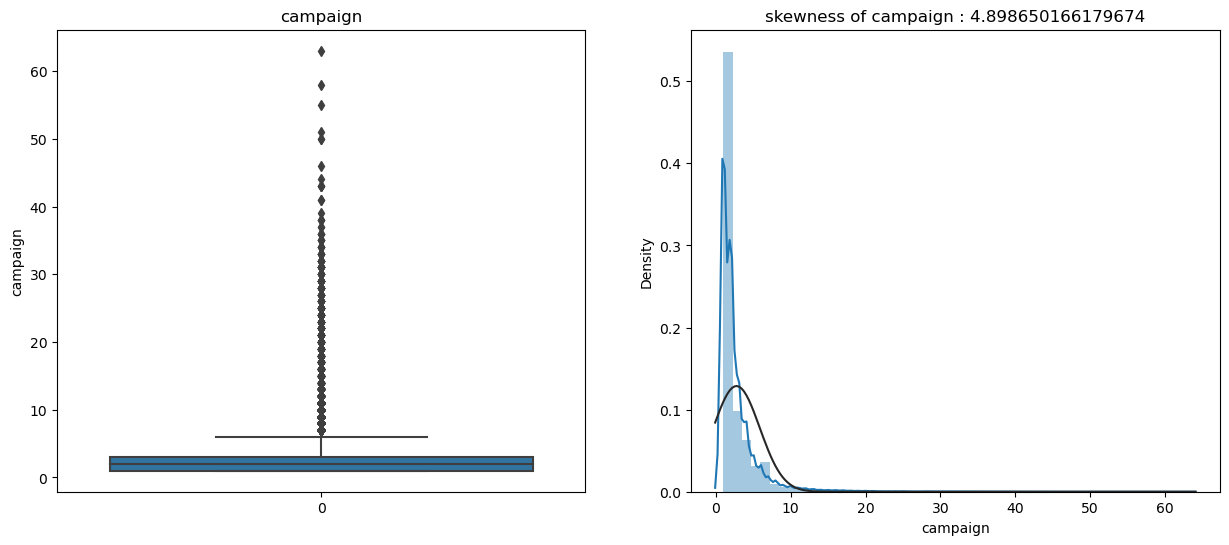

__________________________________________________________________________________________


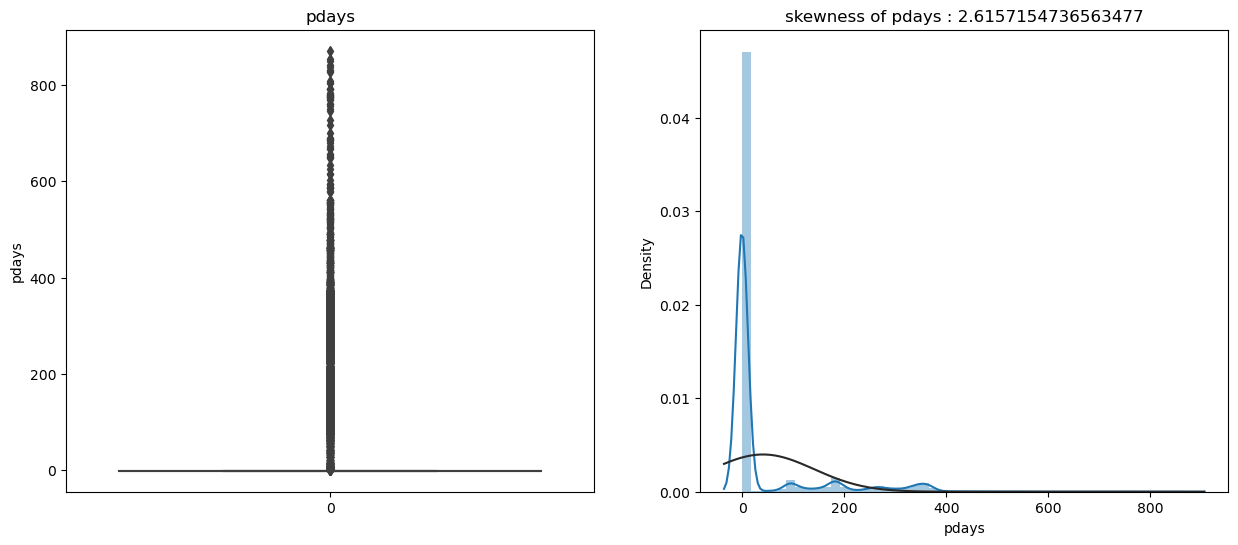

__________________________________________________________________________________________


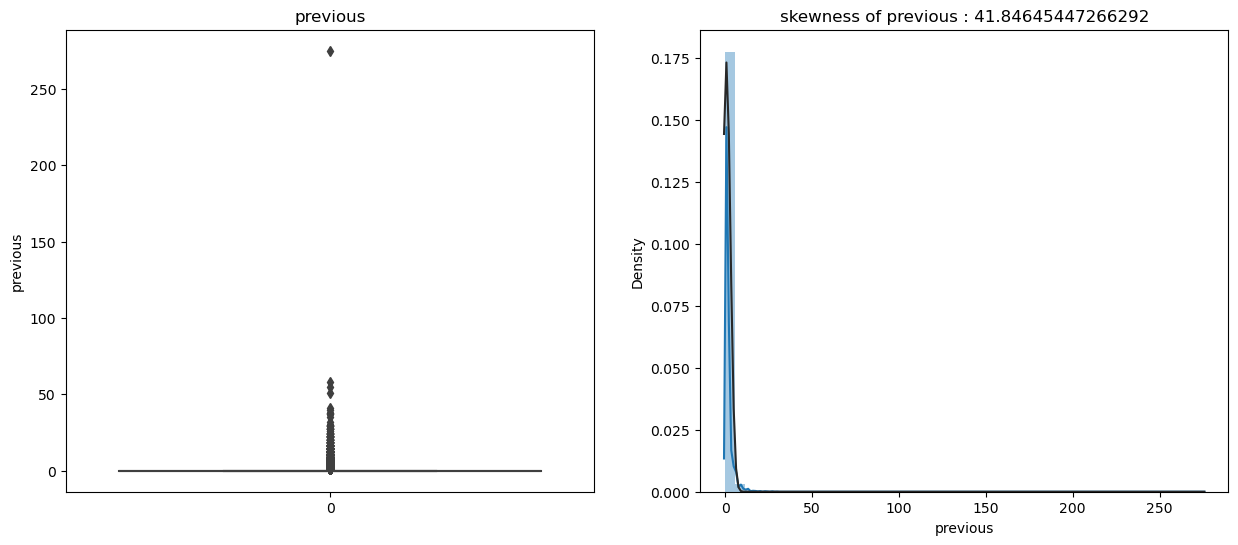

In [24]:
# Checking for outliers in numerical variables using boxplot
from scipy.stats import norm

# Plotting Box and Distribution plot using for loop
for var in numerical_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

- The variables age, balance, duration, campaign, pdays, and previous contain outliers. pdays, and previous have a flat interquartile range; it is best to remove those columns.
- Variable day does not have any outliers.

In [25]:
# Using Inter Quartile Range for removing outliers from numerical variables

# Defining outlier features but remove flat IQR feature pdays and previous
outlier_var=['age', 'balance', 'duration', 'campaign']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    
    # Defining upper and lower limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR
    
    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

__________________________________________________________________________________________


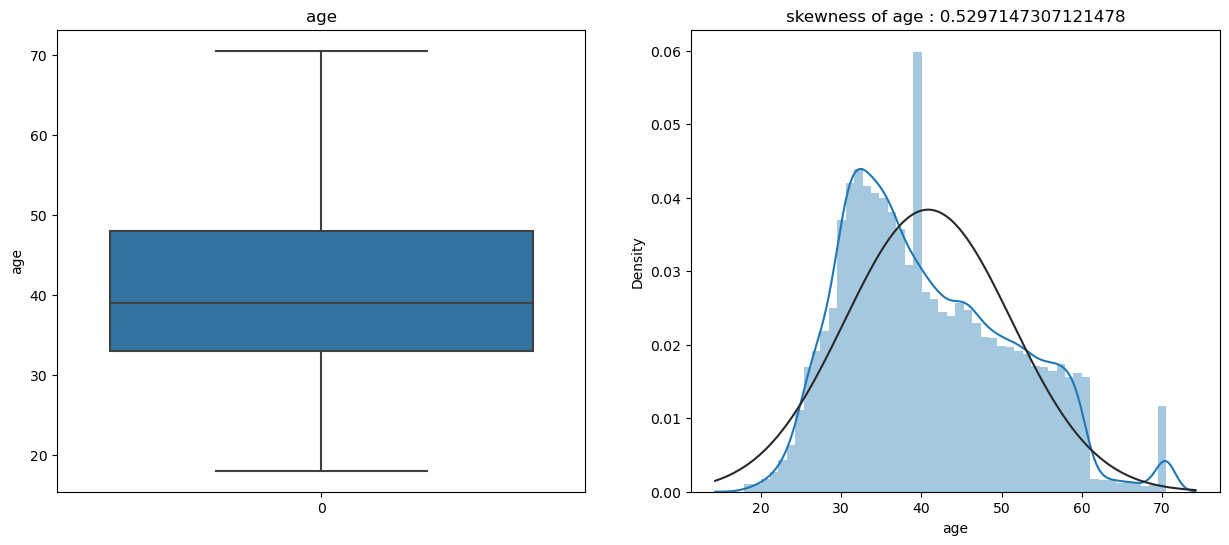

__________________________________________________________________________________________


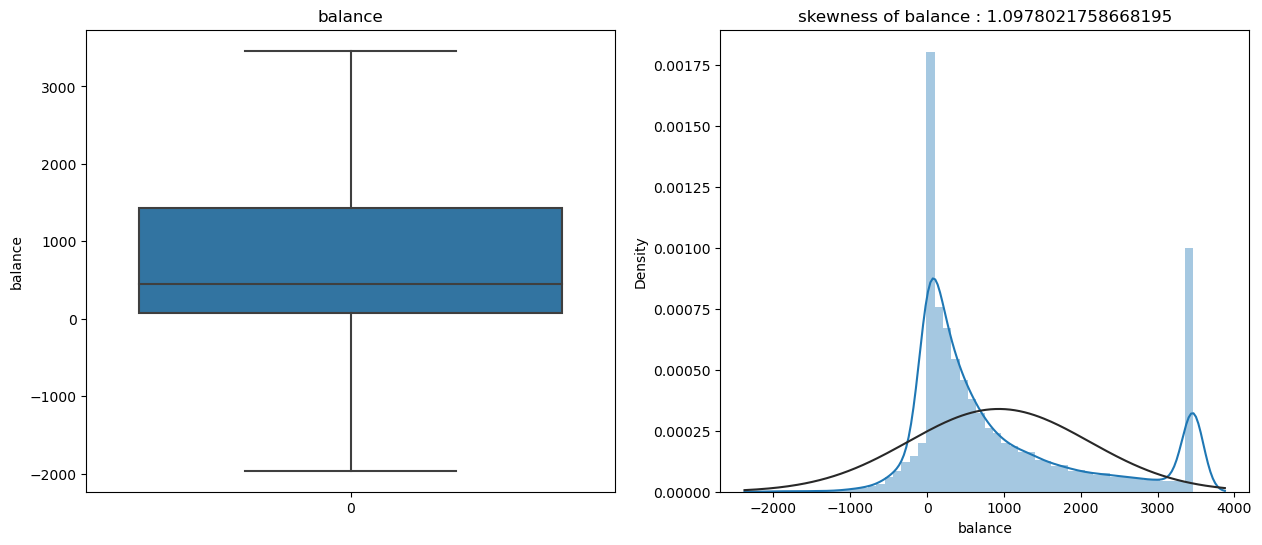

__________________________________________________________________________________________


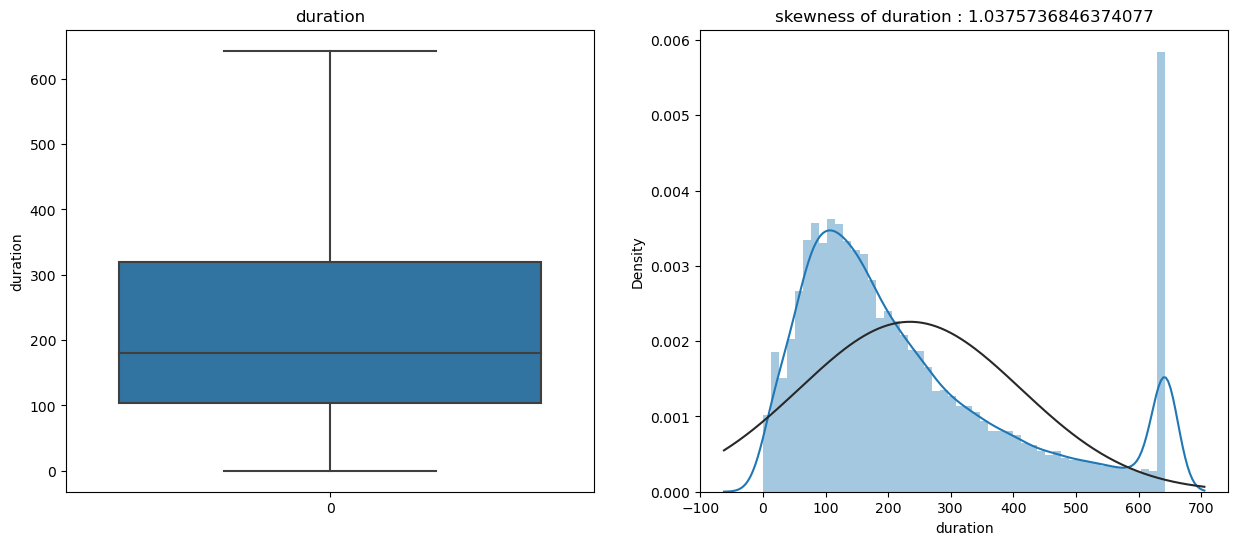

__________________________________________________________________________________________


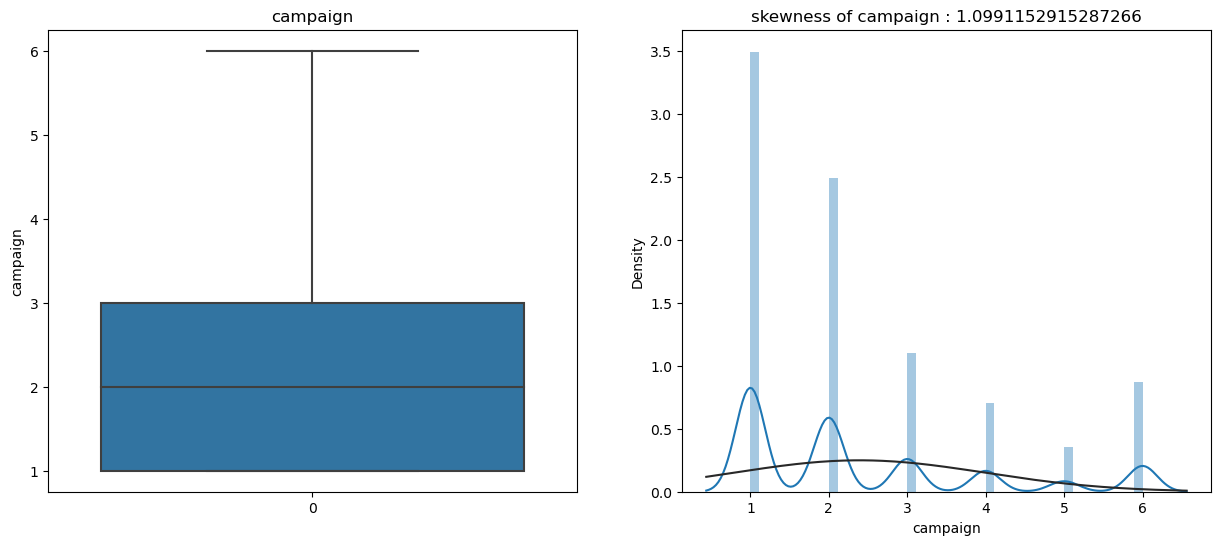

In [26]:
# Using boxplot checking outliers in features after removed using IQR

for var in outlier_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

- Outliers are successfully removed from the dataset.

**<u>Observations :</u>**
- This dataset contains no values that are duplicates.
- Job, education, contacts, and poutcome each have unknown values of 288; 1857; 13020; and 36959. Since unknown values are not defined and can be removed from features by treatment, they can be handled as null.
- Poutcome, contact, education, and job all have null values of 81.45%, 28.80%, 4.11%, and 0.64%, respectively.
- Replaced null values with their equivalent modes for features like contact, education, and employment. Additionally, features with more than 50% null values were eliminated because they were useless and negatively impacted model performance.
- Outliers are treated using the interquartile range for the variables age, balance, duration, campaign, p-days, and previous. It is better to eliminate the columns pdays and previous because they have an interquartile range which is flat.
- No outliers exist on a variable day.

## 6. Exploratory data analysis

#### **<u>[1] Univariate Analysis</u>**

In [27]:
# Defining r to autofit the number and size of plots
r = int(len(df.columns))

In [28]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

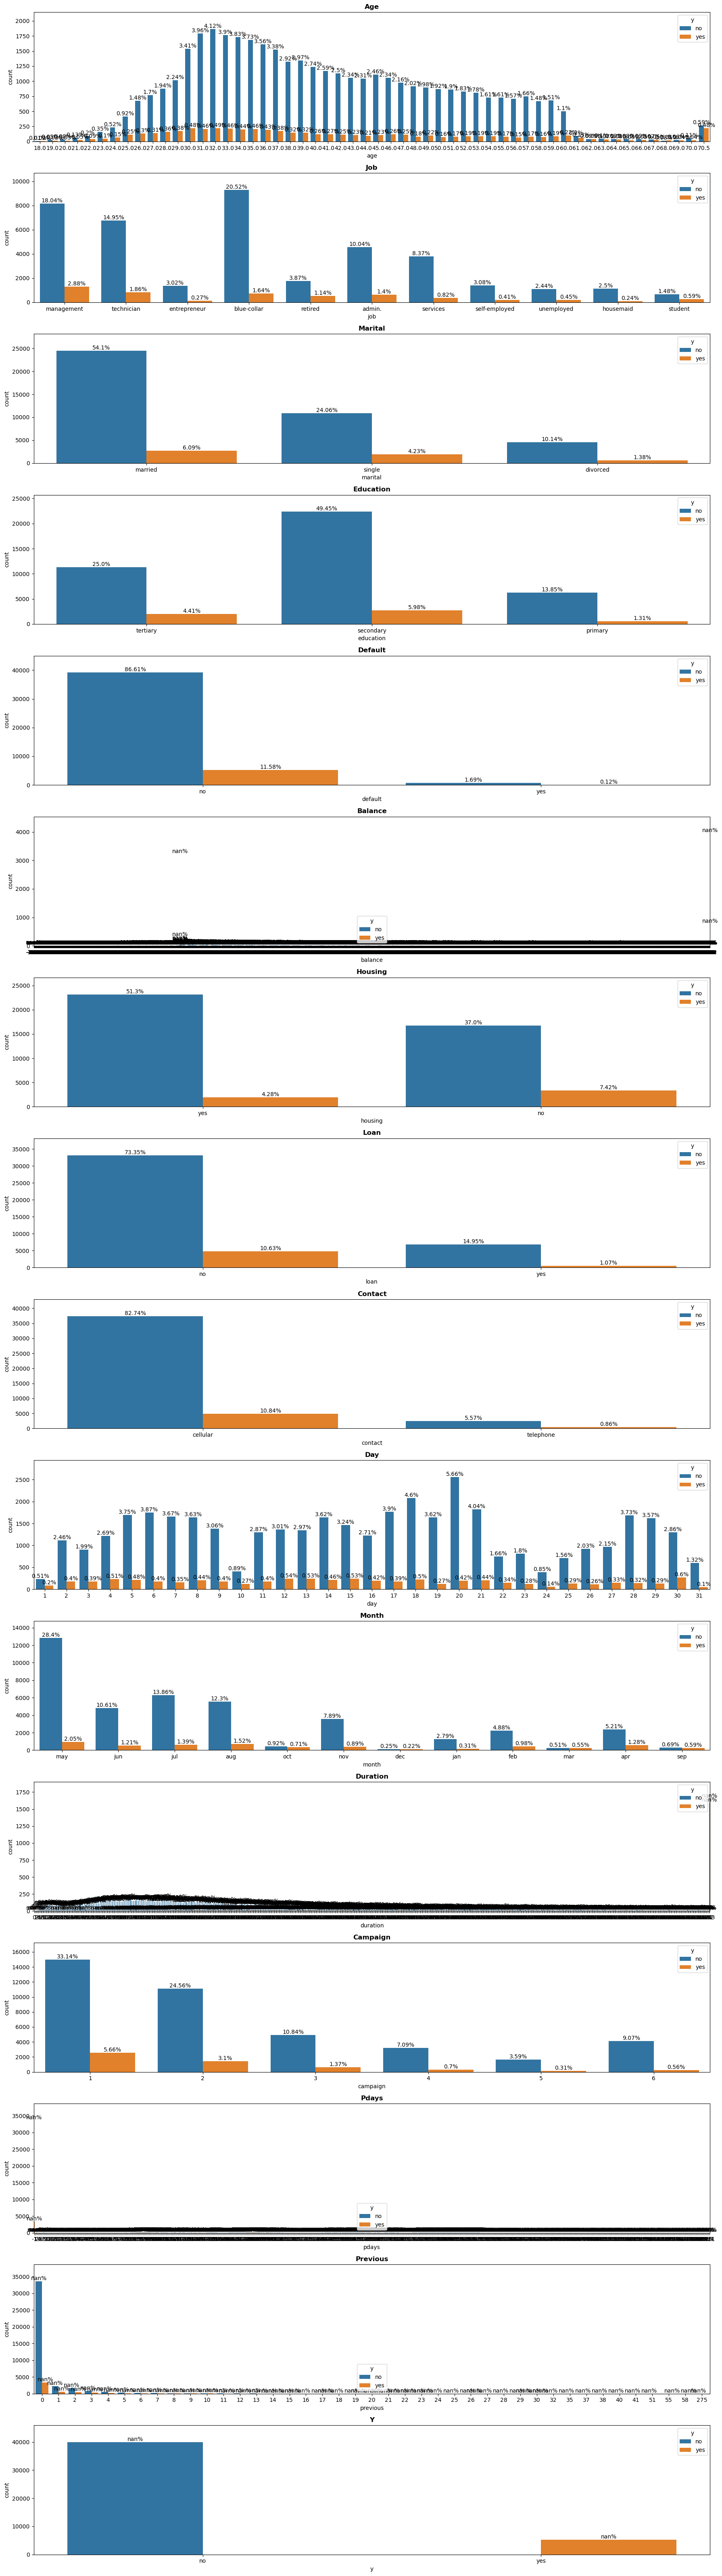

In [29]:
# Plotting the countplots for each variable in target_variables
plt.figure(figsize=(18,r*4))
for n,var in enumerate(df.columns):
    plot = plt.subplot(r,1,n+1)
    sns.countplot(x=df[var], hue=df['y']).margins(y=0.15)
    plt.title(f'{var.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

**<u>Observations :</u>**
- The average client is between the ages of 25 and 60, but the majority of bank term deposits are made by clients between the ages of 30 and 36.
- Most clients with blue-collar jobs do not subscribe to bank term deposits (20.52%), but most clients with managerial jobs do (2.88%).
- Most of the clients are married. Clients who are married are the most likely to subscribe to term deposits, and they are also the least likely to subscribe to term deposits.
- Most of the clients are married. Clients who are married are the most likely to subscribe to term deposits, and divorced clients are less likely to subscribe to term deposits.
- Clients who are more educated than the primary are more likely to sign up for a term deposit.
- Most of the clients who subscribed to term deposits have no credit in default.**
- The majority of clients who have signed up for a term deposit do not have any housing loan.
- If a client has a housing loan, there is a 51% chance that they will not subscribe to a term deposit.
- Clients are more likely to subscribe to the term deposit if they do not have any personal loans.
-  If the client has a personal loan, there is a greater chance that they will not subscribe to a term deposit.
- The clients who were contacted with celluler are mostly subscribed to term deposits.
- Less than one percent of total clients contacted per day subscribe to term deposits.
- In May, June, July, August, and April, more than 1 percentage of clients subscribed to the term deposit, but other than this month, less than 1 percentage of clients subscribed to the term deposit.
- In June, July, August, and April, more than 1 percentage of clients subscribed to the term deposit, but other than this month, less than 1 percentage of clients subscribed to the term deposit. May's subscriber rate is more than double that of the other months of the year, a difference of more than 2 percentage.
- No one has signed up for term deposit if they have received more than three phone calls. Less than three times contacted clients who signed up for term deposits.
- Only 11.7% of total clients sign up for term deposits, which means that there is an 88.3% chance that clients will not subscribe to term deposits.

#### **<u>[2] Bivariate Analysis<u>**

<AxesSubplot:title={'center':'Number of clients who subscribed bank term deposit as per their job and education'}, xlabel='job,education,y'>

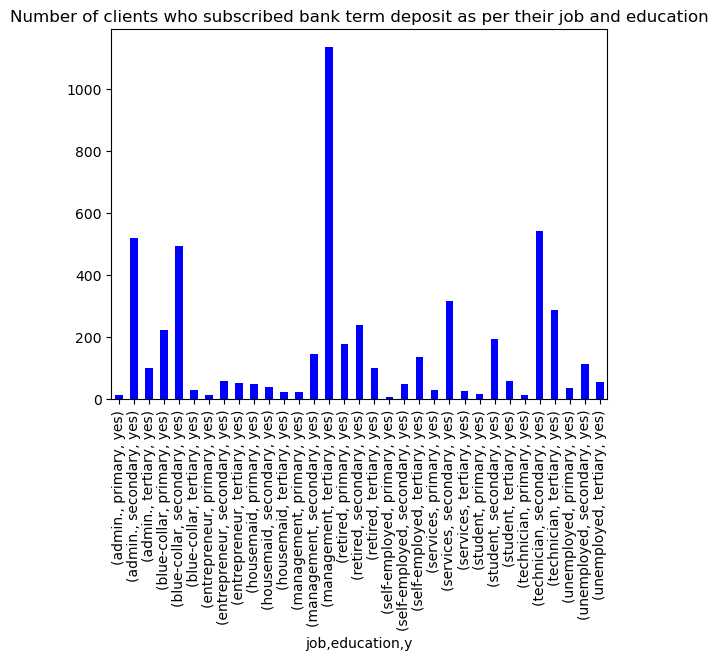

In [30]:
# Plotting a count plot to vizualize the number of customers according to their jobs and lvel of education by using group by operation

# Dataset having only subscribed Bank term deposit with job and education
subscribed_df = df[df.y=='yes']
subscribed_df2=subscribed_df.groupby(['job','education','y'])['y'].count()

# Plotting bar plot for subscribed Bank term deposit with job and education
subscribed_df2.plot(kind="bar",title = 'Number of clients who subscribed bank term deposit as per their job and education', color="blue")

**<u>Observations :</u>**
- Most clients who have management-related jobs and a tertiary degree have subscribed to the term deposits.
- Customers with a secondary education are the second most likely to subscribe to term deposits.

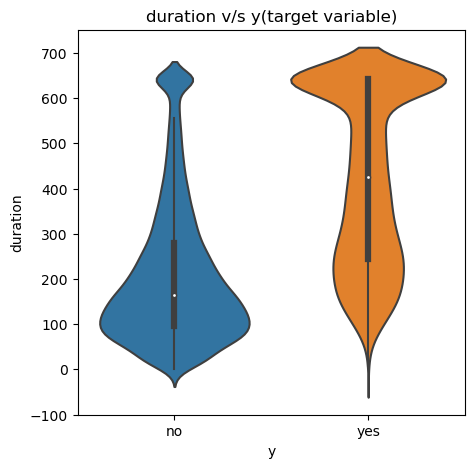

In [31]:
# Plotting box plot for checking the spread of duration in seconds for the target variable(yes or no)
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.violinplot(x=df['y'], y=df['duration'])
ax.set_title('duration v/s y(target variable)')
annot_percent(plot)
plt.show()

**<u>Observations :</u>**
- Clients are more likely to subscribe to term deposits if they spend more time on the phone.
- Average of 400 seconds required to convey clients' intent to subscribe and make a term deposit

<AxesSubplot:title={'center':'Number of clients who subscribed bank term deposit as per their housing loan and personal loan'}, ylabel='loan,housing'>

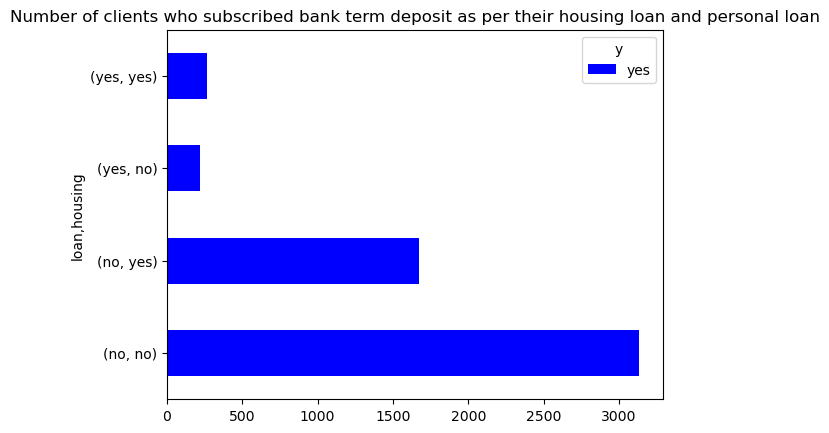

In [32]:
# Plotting bar graph to vizualize the count of clients who have opted for a term deposit given their housing loan and personal loan

# Dataset having only subscribed Bank term deposit with housing loan and personal loan
df_loan_yes = df[df.y=='yes']
df_loan_yes2=df_loan_yes.groupby(['loan','housing','y'])['y'].count().unstack()

# Plotting bar plot for subscribed Bank term deposit with housing loan and personal loan
df_loan_yes2.plot(kind="barh",title = 'Number of clients who subscribed bank term deposit as per their housing loan and personal loan', color="blue")

**<u>Observations :</u>**
- A customer is more likely to sign up for a term deposit if he is entirely debt-free.
- Customers are less likely to choose a term deposit if they already have both types of loans.

#### **<u>[3] Multivariate Analysis<u>**

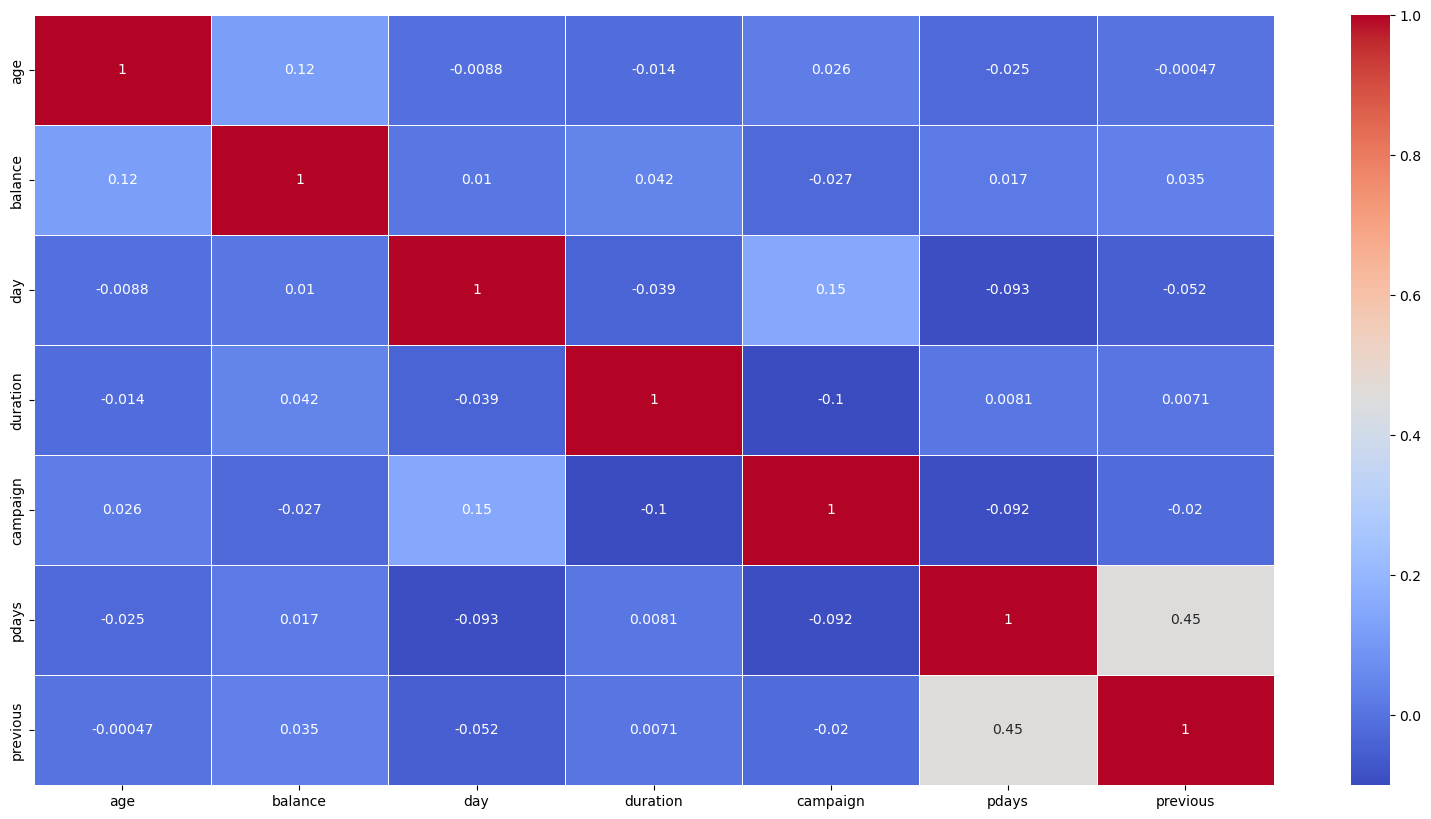

In [33]:
# Examining the heatmap and correlation matrix to determine the relationship between the variables
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df.corr(),ax = ax, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

**<u>Observations :</u>**
- There is no correlation between any independent variables.

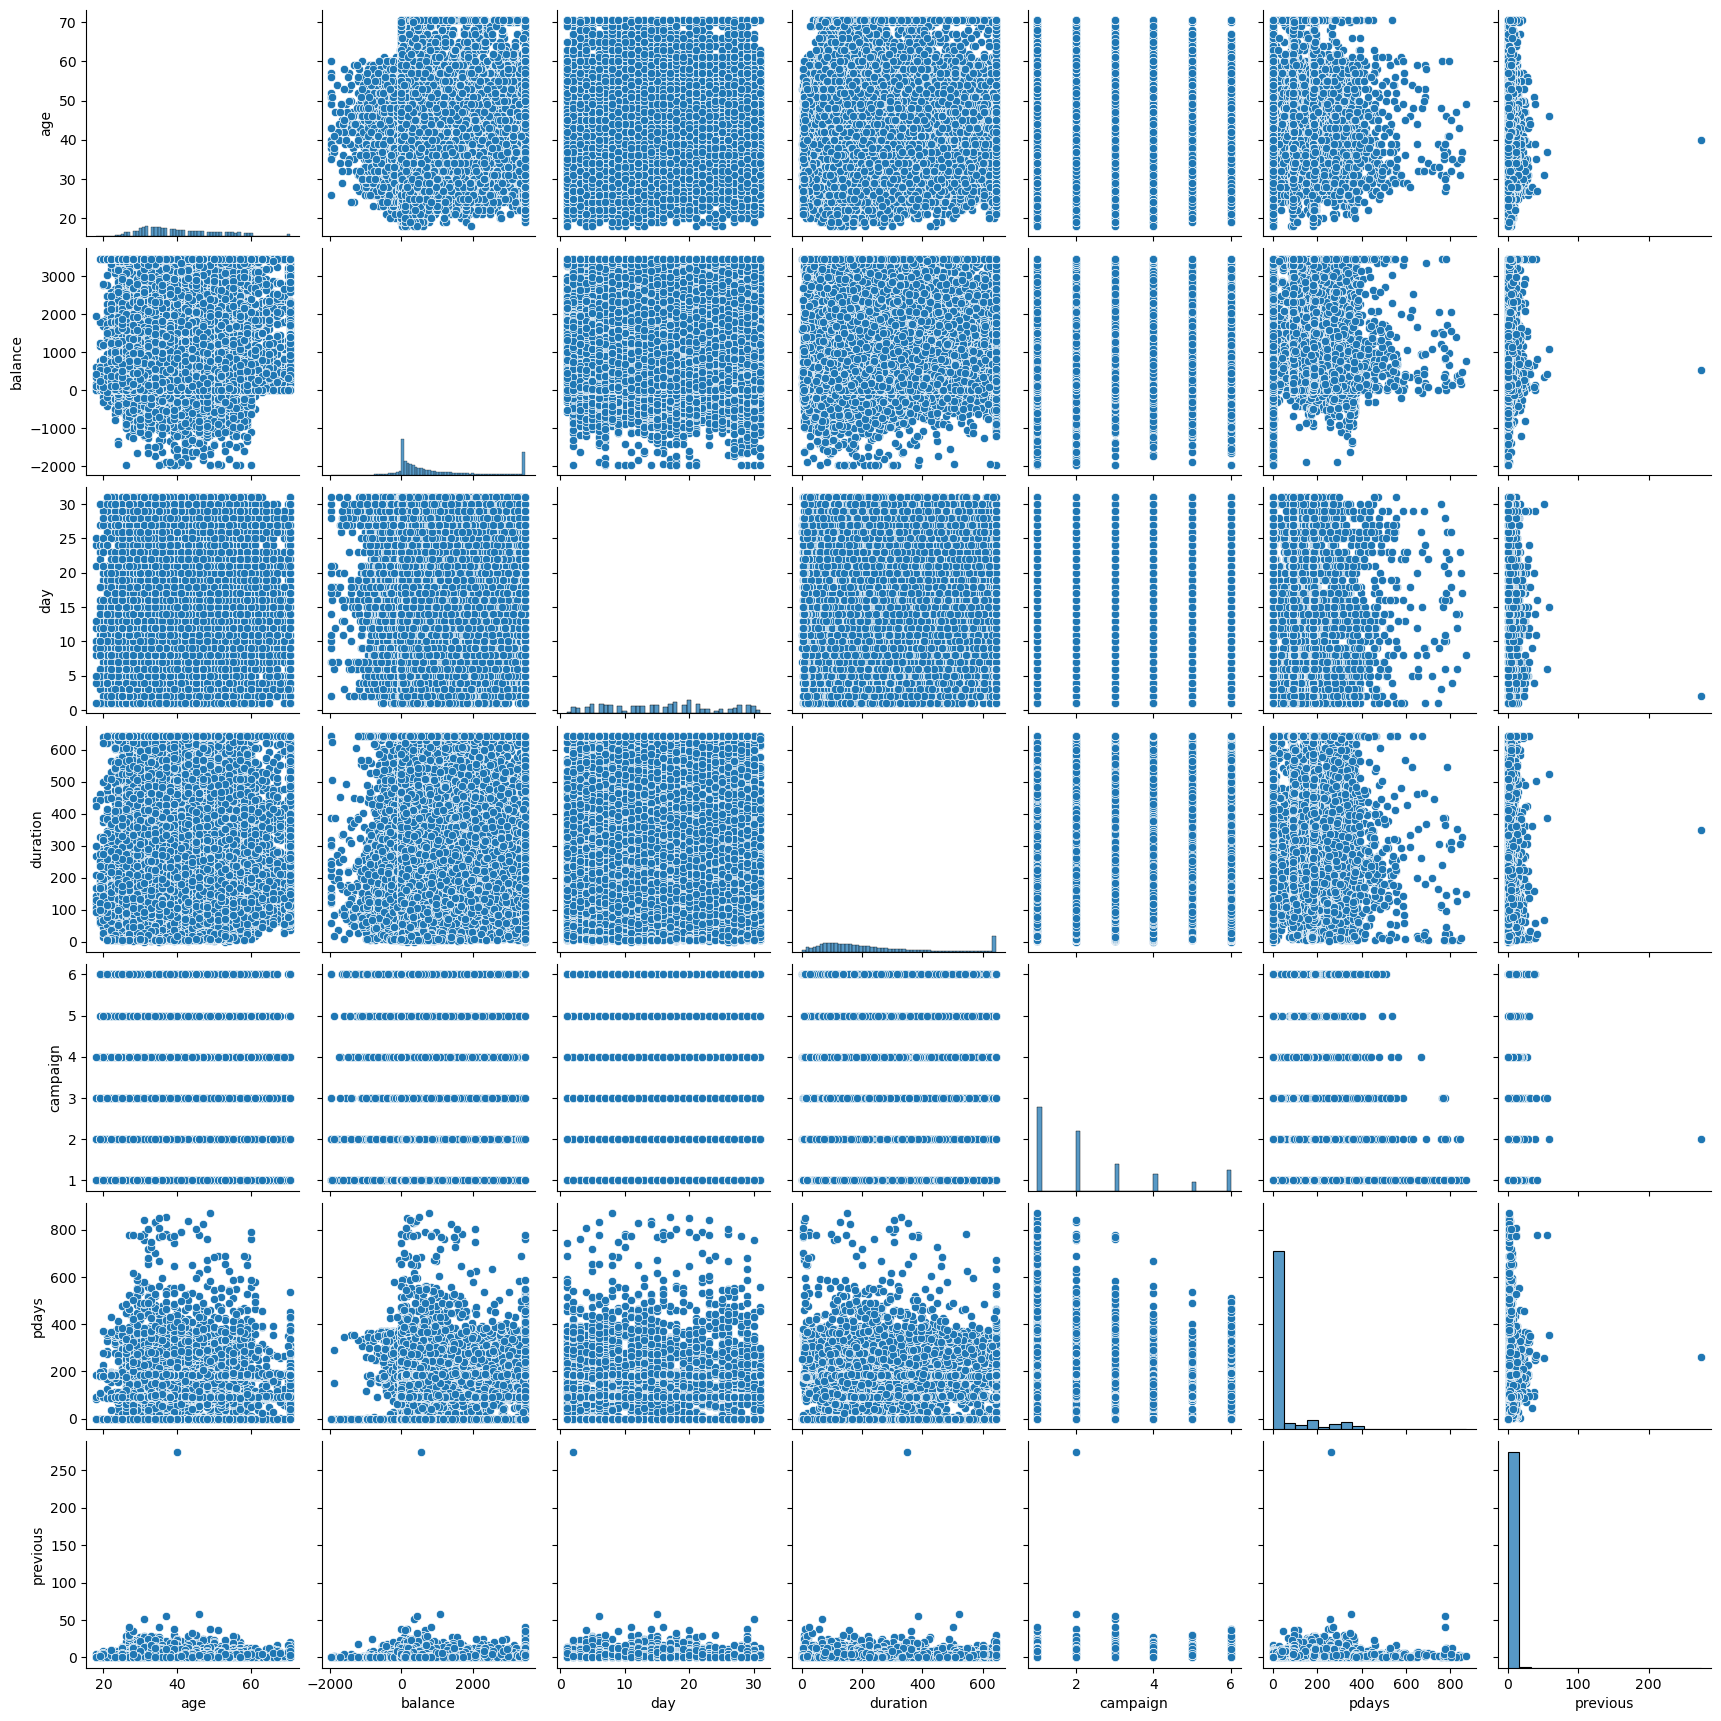

In [34]:
# Pair Plot visualization code
sns.pairplot(df, palette="husl")
plt.show()

## 7. Data Pre-processing

#### **<u>[1] Categorical Encoding</u>**

In [35]:
# Checking basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  y          45211 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 5.5+ MB


In [36]:
# Addressing categorical variables from the dataset
categorical_variables=df.describe(include=['object']).columns
print(f'Categorical variables are : {list(categorical_variables)}')

Categorical variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']


In [37]:
# Checking categories in each categorical features
for var in categorical_variables:
    print(df[var].value_counts())
    print('__'*45)

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64
__________________________________________________________________________________________
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
__________________________________________________________________________________________
secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64
__________________________________________________________________________________________
no     44396
yes      815
Name: default, dtype: int64
__________________________________________________________________________________________
yes    25130
no     20081
Name: housing, dtype: int64
__________________________________________________________________________________

**<u>Observations :</u>**
- With only a few categories for the categorical variables marital, education, default, housing, loan, contact, and y, label encoding can be applied. One hot encoding can be used for the categorical variables job and month, as they have numerous categories.

In [38]:
## label encoding

# Mapping the categorical variables whoes having limited categories
df['marital'] = df['marital'].map({'single':0,'married':1,'divorced':2})
df['education'] = df['education'].map({'secondary':0,'tertiary':1, 'primary':2})
df['default'] = df['default'].map({'yes':1,'no':0})
df['housing'] = df['housing'].map({'yes':1,'no':0})
df['loan'] = df['loan'].map({'yes':1,'no':0})
df['contact'] = df['contact'].map({'cellular':1,'telephone':0})
df['y'] = df['y'].map({'yes':1,'no':0})

In [39]:
## One hot encoding for variable job and month
df=pd.get_dummies(df, columns=['job', "month"], prefix=["job", "month"], drop_first=True)

In [40]:
# Checking basic information of dataset after feature encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  float64
 1   marital            45211 non-null  int64  
 2   education          45211 non-null  int64  
 3   default            45211 non-null  int64  
 4   balance            45211 non-null  int64  
 5   housing            45211 non-null  int64  
 6   loan               45211 non-null  int64  
 7   contact            45211 non-null  int64  
 8   day                45211 non-null  int64  
 9   duration           45211 non-null  int64  
 10  campaign           45211 non-null  int64  
 11  pdays              45211 non-null  int64  
 12  previous           45211 non-null  int64  
 13  y                  45211 non-null  int64  
 14  job_blue-collar    45211 non-null  uint8  
 15  job_entrepreneur   45211 non-null  uint8  
 16  job_housemaid      452

In [41]:
# Final Dataset
pd.set_option('display.max_columns', None)
df.head()

,age,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58.0,1,1,0,2143,1,0,1,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44.0,0,0,0,29,1,0,1,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33.0,1,0,0,2,1,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,47.0,1,0,0,1506,1,0,1,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,33.0,0,0,0,1,0,0,1,5,198,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### **<u>[2] Separating Dependant and Independant variables</u>**

In [42]:
## Separating independant variables and dependant variable

# Creating the dataset with all dependent variables
dependent_variable = 'y'

# Creating the dataset with all independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

# Create the data of independent variables
X = df[independent_variables].copy()
# Create the data of dependent variable
y = df[dependent_variable].copy()

#### **<u>[3] Feature Manipulation & Selection</u>**

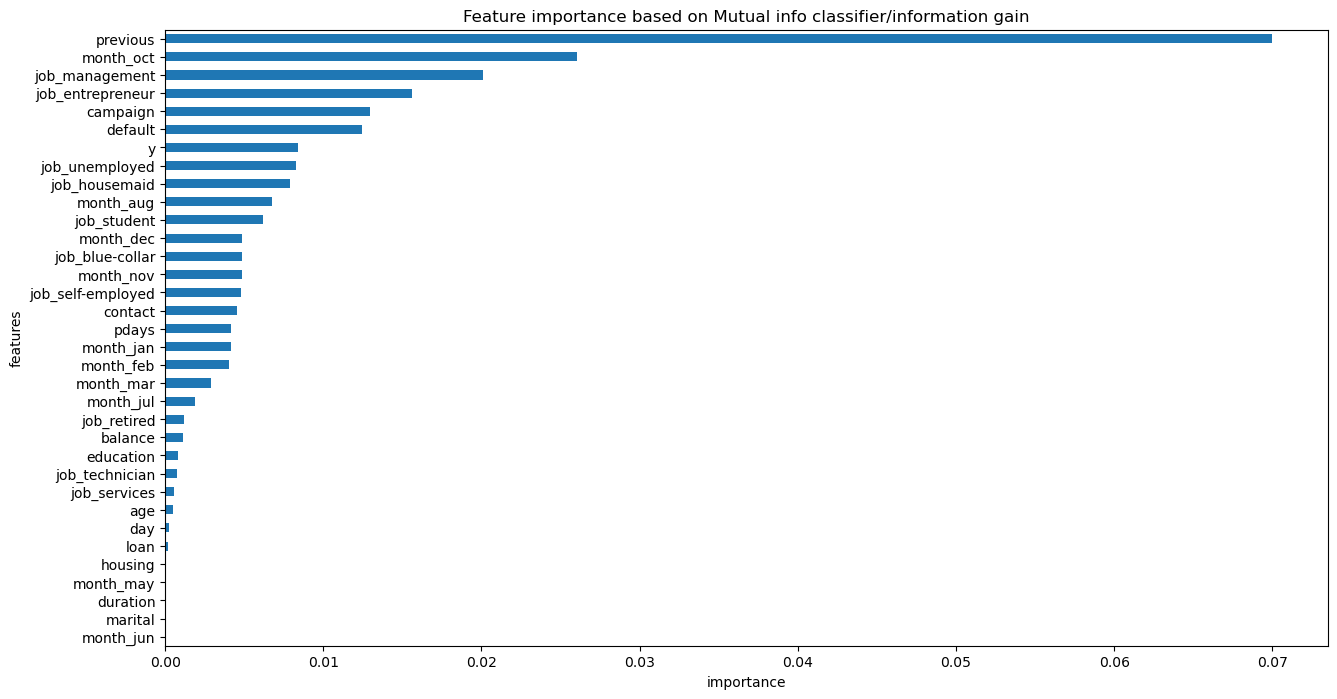

In [43]:
# Plotting feature importance for better selection to avoid overfitting

from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X,y)
feature_importances = pd.Series(importance,df.columns[0:len(df.columns[0:34])]).sort_values(ascending=True)
plt.figure(figsize=(15,8))
feature_importances.plot(kind='barh')
plt.title("Feature importance based on Mutual info classifier/information gain")
plt.xlabel('importance')
plt.ylabel('features')
plt.show()

**<u>Observations :</u>**
- Important features are listed in descending order of their importance and can be removed if they are no longer important, but all the features that we have included have significant importance, so we are keeping all of them.

#### **<u>[4] Handling Imbalanced Dataset</u>**

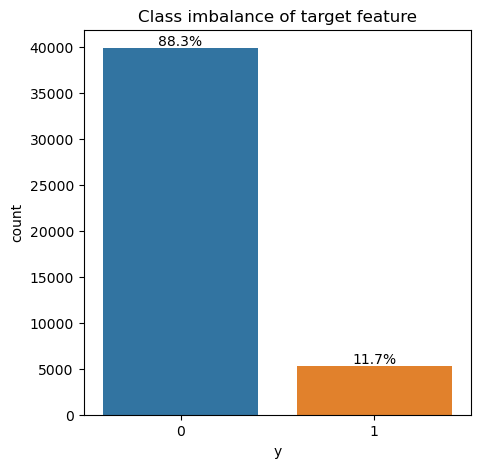

In [44]:
# Plotting bar graph to vizualize the class imbalance of target feature
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=df['y'])
plt.title('Class imbalance of target feature')
annot_percent(plot)
plt.show()

- We clearly detect a class imbalance beacause discovered that the number of clients who subscribed to term deposits is 11.7% lower than the number of clients who did not (88.3%).

In [45]:
# Import model imblearn in envirnoment
!pip install imblearn

In [46]:
# Using Synthetic Minority Oversampling Technique (SMOTE) for handling class imbalance

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,y)

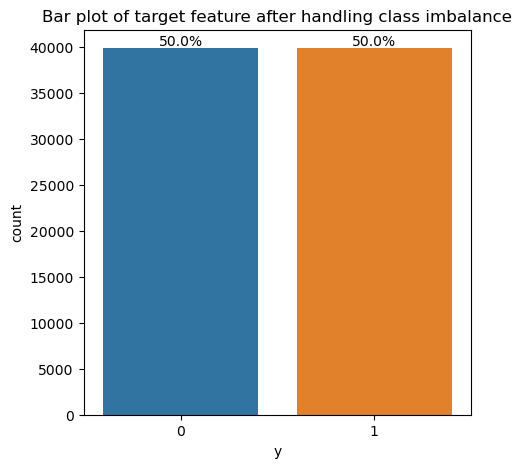

In [47]:
# Plotting bar graph to vizualize the class imbalance of target feature
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=y_smote)
plt.title('Bar plot of target feature after handling class imbalance')
annot_percent(plot)
plt.show()

- Class imbalance handled successfully using the Synthetic Minority Oversampling Technique (SMOTE).

#### **<u>[5] Data Splitting</u>**

In [48]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test= train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [49]:
# Checking shape of split
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (63875, 34)
Shape of X_test : (15969, 34)
Shape of y_train : (63875,)
Shape of y_test : (15969,)


- We divided the dataset into 20% for model testing and 80% for training.

In [50]:
# Checking values of splitted dataset
X_train[0:3]

,default,month_feb,month_jul,previous,job_technician,month_aug,job_housemaid,education,month_dec,job_self-employed,age,marital,duration,day,job_student,housing,month_may,balance,month_nov,loan,month_jan,month_oct,job_services,contact,month_mar,campaign,job_management,job_retired,job_blue-collar,job_unemployed,month_jun,job_entrepreneur,month_sep,pdays
76180,0,1,0,3,0,0,0,1,0,0,70.028256,1,310,10,0,0,0,3324,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,86
36038,0,0,0,0,0,0,0,1,0,0,50.000000,1,67,11,0,1,1,4,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,-1
41791,0,0,0,0,0,0,0,1,0,0,62.000000,1,78,13,0,0,0,0,0,0,0,1,0,1,0,3,1,0,0,0,0,0,0,-1


In [51]:
# Checking values of splitted dataset
X_test[0:3]

,default,month_feb,month_jul,previous,job_technician,month_aug,job_housemaid,education,month_dec,job_self-employed,age,marital,duration,day,job_student,housing,month_may,balance,month_nov,loan,month_jan,month_oct,job_services,contact,month_mar,campaign,job_management,job_retired,job_blue-collar,job_unemployed,month_jun,job_entrepreneur,month_sep,pdays
72809,0,0,0,0,0,0,0,0,0,0,39.273337,1,315,17,0,0,0,3462,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,-1
71061,0,0,0,0,0,0,0,0,0,0,46.690791,0,643,22,0,1,0,1100,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,-1
57176,0,0,0,0,0,0,0,0,0,0,54.030217,1,643,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,-1


#### **<u>[6] Data Scaling</u>**

In [52]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- MinMaxScaler preserves the shape of the original distribution. It doesn't meaningfully change the information embedded in the original data. So we used MinMaxScaler for scaling the dataset.

In [53]:
# Checking values of splitted dataset after normalisation
X_train[0:5]

array([[0.        , 1.        , 0.        , 0.05263158, 0.        ,
        0.        , 0.        , 0.5       , 0.        , 0.        ,
        0.9910144 , 0.5       , 0.48211509, 0.3       , 0.        ,
        0.        , 0.        , 0.97455752, 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.09977064],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.        , 0.        ,
        0.60952381, 0.5       , 0.10419907, 0.33333333, 0.        ,
        1.        , 1.        , 0.36246313, 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
  

In [54]:
# Checking values of splitted dataset after normalisation
X_test[0:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.40520641, 0.5       , 0.48989114, 0.53333333, 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.2       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.54649125, 0.        , 1.        , 0.7       , 0.        ,
        1.        , 0.        , 0.56452802, 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.2       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
  

## 8. ML Model Implementation

In [55]:
# Defining function which fit classification algoritham, evaluate and visualise model using train test split

# Import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Defining function
def classification_model(X_train, X_test, y_train, y_test, clf):
    """
    function fit the algorithm on the training set, evaluate the model, and visualise evaluation metrics
    """
    ## Fit the model using training dataset
    model=clf.fit(X_train, y_train)
    print(model)
    print('=='*45)
    
    ## Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ## Evaluate the model
    print('Training set evaluation result :\n')
    cm_train = confusion_matrix(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)
    print("Confusion Matrix: \n", cm_train)
    print("Accuracy: ", accuracy_train)
    print("Precision: ", precision_train)
    print("Recall: ", recall_train)
    print("F1 Score: ", f1_train)
    print("roc_auc_score: ", roc_auc_score_train)
    print('\n-------------------------------\n')
    print('Test set evaluation result :\n')
    cm_test = confusion_matrix(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)
    print("Confusion Matrix: \n", cm_test)
    print("Accuracy: ", accuracy_test)
    print("Precision: ", precision_test)
    print("Recall: ", recall_test)
    print("F1 Score: ", f1_test)
    print("roc_auc_score: ", roc_auc_score_test)
    print('=='*45)
    
    ## Visualizes evaluation metrics
    fig,axes = plt.subplots(nrows=2, ncols=2)
    ax1 = sns.heatmap(cm_train, annot=True, ax=axes[0,0], fmt='d')
    ax1.set_title('Confusion Matrix for training set')
    ax1.set_ylabel('True label')
    ax1.set_xlabel('Predicted label')
    ax2 = sns.heatmap(cm_test, annot=True, ax=axes[0,1], fmt='d')
    ax2.set_title('Confusion Matrix for test set')
    ax2.set_ylabel('True label')
    ax2.set_xlabel('Predicted label')
    ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_train, precision_train, recall_train, f1_train, roc_auc_score_train], ax=axes[1,0])
    ax3.set_title('Evaluation Metrics for training set')
    ax3.tick_params(axis='x', rotation=90)
    ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_test, precision_test, recall_test, f1_test, roc_auc_score_test], ax=axes[1,1])
    ax4.set_title('Evaluation Metrics for test set')
    ax4.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    print('=='*45)
    
    return {'model': model, 'y_train_pred': y_train_pred, 'y_test_pred': y_test_pred, 'cm_test': cm_test, 'accuracy_test': accuracy_test, 
            'precision_test': precision_test, 'recall_test': recall_test, 'f1_test': f1_test, 'roc_auc_score_test': roc_auc_score_test}

In [56]:
# Defining function which fit classification algoritham using GridSearchCV, evaluate and visualise model

# Import necessary dependancy
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV

# Defining function
def classification_CV_model(X_train, X_test, y_train, y_test, clf, param_grid):
    """
    function fit the algorithm using GridSearchCV on the training set, evaluate the model, and visualise evaluation metrics
    """
    ## Fit the model on training dataset
    classifier = clf
    model = GridSearchCV(classifier, param_grid, verbose=1, scoring='accuracy', cv=3, n_jobs=-1)
    model.fit(X_train, y_train)
    print(model)
    print('=='*45)
    
    # Print the best parameters and score
    print("Best parameters:", model.best_params_)
    print("Best score:", model.best_score_)
    print('=='*45)
    
    ## Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ## Evaluate the model
    print('Training set evaluation result :\n')
    cm_train = confusion_matrix(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)
    print("Confusion Matrix: \n", cm_train)
    print("Accuracy: ", accuracy_train)
    print("Precision: ", precision_train)
    print("Recall: ", recall_train)
    print("F1 Score: ", f1_train)
    print("roc_auc_score: ", roc_auc_score_train)
    print('\n-------------------------------\n')
    print('Test set evaluation result :\n')
    cm_test = confusion_matrix(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)
    print("Confusion Matrix: \n", cm_test)
    print("Accuracy: ", accuracy_test)
    print("Precision: ", precision_test)
    print("Recall: ", recall_test)
    print("F1 Score: ", f1_test)
    print("roc_auc_score: ", roc_auc_score_test)
    print('=='*45)
    
    ## Visualizes evaluation metrics
    fig,axes = plt.subplots(nrows=2, ncols=2)
    ax1 = sns.heatmap(cm_train, annot=True, ax=axes[0,0], fmt='d')
    ax1.set_title('Confusion Matrix for training set')
    ax1.set_ylabel('True label')
    ax1.set_xlabel('Predicted label')
    ax2 = sns.heatmap(cm_test, annot=True, ax=axes[0,1], fmt='d')
    ax2.set_title('Confusion Matrix for test set')
    ax2.set_ylabel('True label')
    ax2.set_xlabel('Predicted label')
    ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_train, precision_train, recall_train, f1_train, roc_auc_score_train], ax=axes[1,0])
    ax3.set_title('Evaluation Metrics for training set')
    ax3.tick_params(axis='x', rotation=90)
    ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_test, precision_test, recall_test, f1_test, roc_auc_score_test], ax=axes[1,1])
    ax4.set_title('Evaluation Metrics for test set')
    ax4.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    print('=='*45)
    
    return {'model': model, 'y_train_pred': y_train_pred, 'y_test_pred': y_test_pred, 'cm_test': cm_test, 'accuracy_test': accuracy_test, 
            'precision_test': precision_test, 'recall_test': recall_test, 'f1_test': f1_test, 'roc_auc_score_test': roc_auc_score_test}

In [57]:
# Defining function to plot ROC curve
def plot_roc_curve(y_test, y_pred):
    """
    plots the roc curve
    """
    # Generate a list of false and true positive rates 
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # Calculate the area under the curve (AUC) 
    roc_auc = auc(fpr, tpr) 
    # Plotting the ROC curve 
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    # Labeling the graph
    plt.xlabel('False Positive Rate (Precision)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic Curve') 
    plt.legend(loc="lower right")
    # Show the plot
    plt.show()

### **[1] Decision Tree**

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
Training set evaluation result :

Confusion Matrix: 
 [[27814  4200]
 [ 6578 25283]]
Accuracy:  0.8312641878669276
Precision:  0.857545025947156
Recall:  0.7935406923825367
F1 Score:  0.8243022952529995
roc_auc_score:  0.8311740445732263

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[6813 1095]
 [1678 6383]]
Accuracy:  0.8263510551693907
Precision:  0.8535704733886066
Recall:  0.7918372410370922
F1 Score:  0.821545788017247
roc_auc_score:  0.8266849331133868


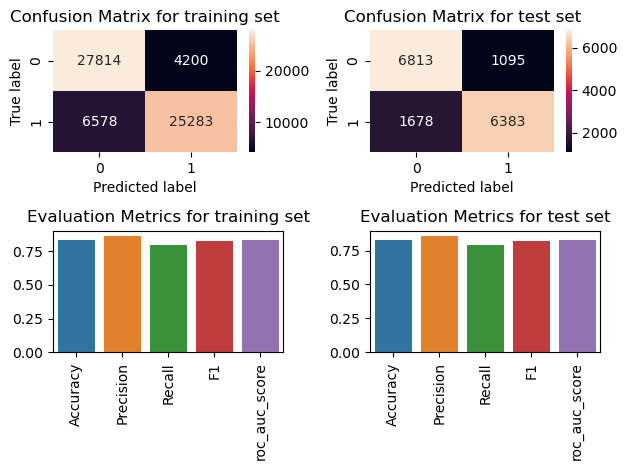

In [58]:
# Import Decision Tree algoritham in envirnoment
from sklearn.tree import DecisionTreeClassifier
# Fitting Decision Tree model to training set
classifier_dt = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
dt=classification_model(X_train, X_test, y_train, y_test, classifier_dt)

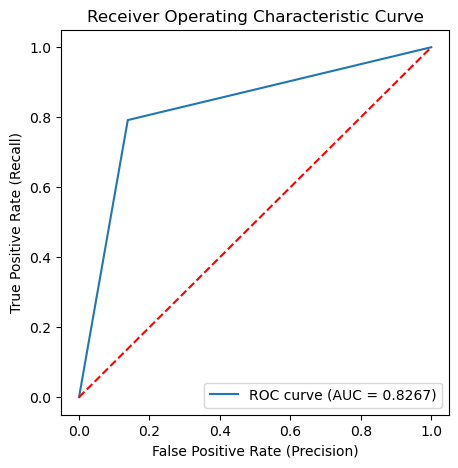

In [59]:
# Plot ROC curve for Decision Tree classifier
y_pred=dt['y_test_pred']
plot_roc_curve(y_test, y_pred)

#### Cross- Validation & Hyperparameter Tuning

Fitting 3 folds for each of 18 candidates, totalling 54 fits
GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_leaf_nodes=10,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150]},
             scoring='accuracy', verbose=1)
Best parameters: {'max_depth': 6, 'min_samples_leaf': 40, 'min_samples_split': 50}
Best score: 0.8263171363858982
Training set evaluation result :

Confusion Matrix: 
 [[27814  4200]
 [ 6578 25283]]
Accuracy:  0.8312641878669276
Precision:  0.857545025947156
Recall:  0.7935406923825367
F1 Score:  0.8243022952529995
roc_auc_score:  0.8311740445732263

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[6813 1095]
 [1678 6383]]
Accuracy:  0.8263510551693907
Precision:  0.85357047

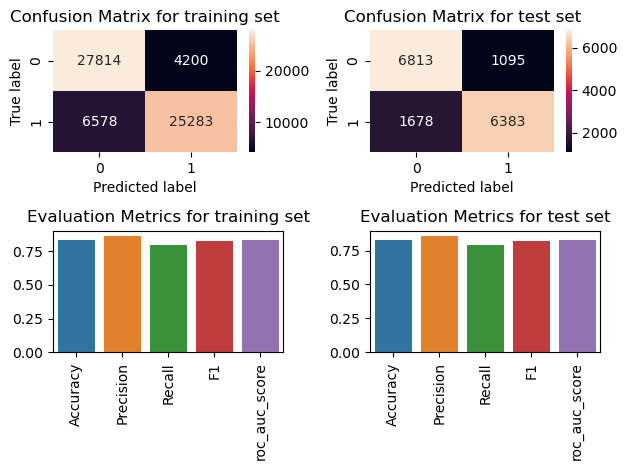

In [60]:
## Import Decision Tree algoritham in envirnoment
from sklearn.tree import DecisionTreeClassifier

## Fitting Decision Tree model to training set using cross validation

# Defining param_dict
param_grid = {'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
# Creating instance of Decision Tree classifier
classifier_dt = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
#Fitting model
dt_cv=classification_CV_model(X_train, X_test, y_train, y_test, classifier_dt, param_grid)

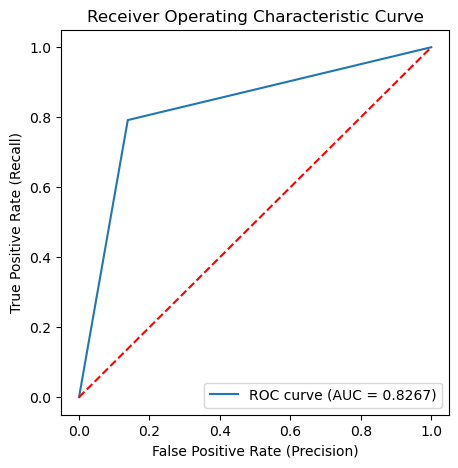

In [61]:
# Plot ROC curve for Decision Tree classifier
y_pred=dt_cv['y_test_pred']
plot_roc_curve(y_test, y_pred)

#### Comparing Evaluation Metrics of Train/Test Split and Cross-Validation

+----+----------------------+--------------------+--------------------+
|    | Evaluation Metrics   |   Train/Test Split |   Cross-Validation |
+====+======================+====================+====================+
|  0 | Accuracy             |           0.826351 |           0.826351 |
+----+----------------------+--------------------+--------------------+
|  1 | Precision            |           0.85357  |           0.85357  |
+----+----------------------+--------------------+--------------------+
|  2 | Recall               |           0.791837 |           0.791837 |
+----+----------------------+--------------------+--------------------+
|  3 | F1-score             |           0.821546 |           0.821546 |
+----+----------------------+--------------------+--------------------+
|  4 | roc_auc_score        |           0.826685 |           0.826685 |
+----+----------------------+--------------------+--------------------+




<Figure size 700x700 with 0 Axes>

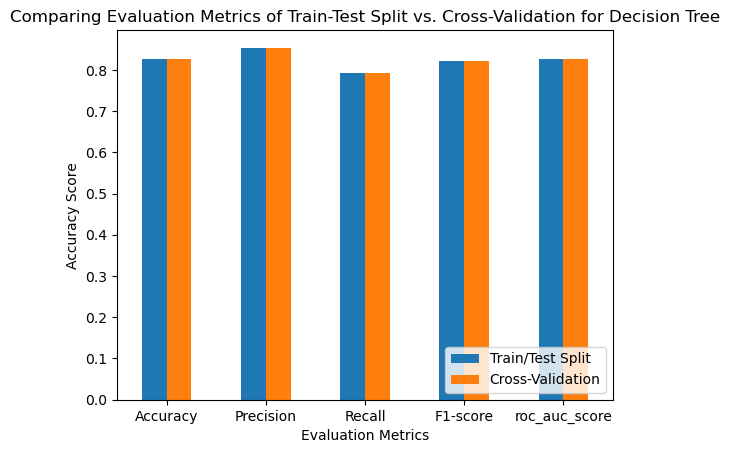

In [62]:
# Comparing evaluation metrics of train_test_split and GridSearchCV of Decision Tree model

import pandas as pd
import matplotlib.pyplot as plt

# Data 
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
train_test_split = [dt['accuracy_test'],dt['precision_test'],dt['recall_test'],dt['f1_test'],dt['roc_auc_score_test']]
cross_validation = [dt_cv['accuracy_test'],dt_cv['precision_test'],dt_cv['recall_test'],dt_cv['f1_test'],dt_cv['roc_auc_score_test']]

# Create a dataframe
dt_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Train/Test Split': train_test_split,
                   'Cross-Validation': cross_validation})
# Print dataframe
print('=='*45)
print(tabulate(dt_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# Create a barplot
plt.figure(figsize=(7,7))
ax=dt_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of Train-Test Split vs. Cross-Validation for Decision Tree")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.legend(loc="lower right")

# Show the plot
plt.show()
print('=='*45)

**<u>Observations</u> :**
- No improvement seen in the model after training with cross-validation.
- We got 0.82  % of accuracy in Decision Tree model.

### **[2] Random Forest**

RandomForestClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
Training set evaluation result :

Confusion Matrix: 
 [[28228  3786]
 [ 4230 27631]]
Accuracy:  0.8745048923679061
Precision:  0.8794919947798963
Recall:  0.8672358055302721
F1 Score:  0.8733209014191348
roc_auc_score:  0.8744875223065867

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [[6956  952]
 [1100 6961]]
Accuracy:  0.8715010332519256
Precision:  0.8796916466573992
Recall:  0.8635405036595956
F1 Score:  0.8715412545386253
roc_auc_score:  0.8715780414099698


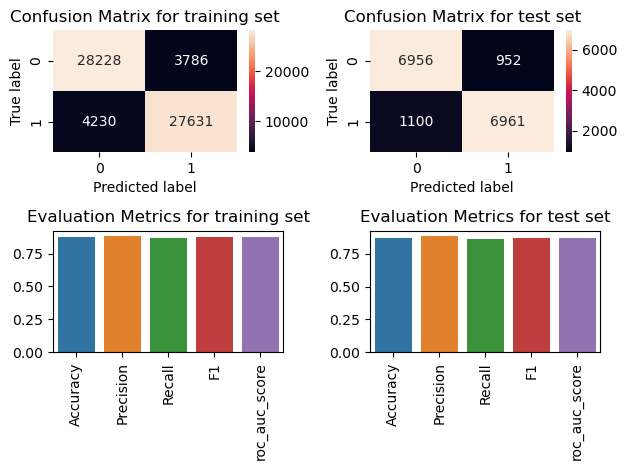

In [63]:
# Import Random Forest algoritham in envirnoment
from sklearn.ensemble import RandomForestClassifier
# Fitting Random Forest model to training set
classifier_rf = RandomForestClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
rf=classification_model(X_train, X_test, y_train, y_test, classifier_rf)

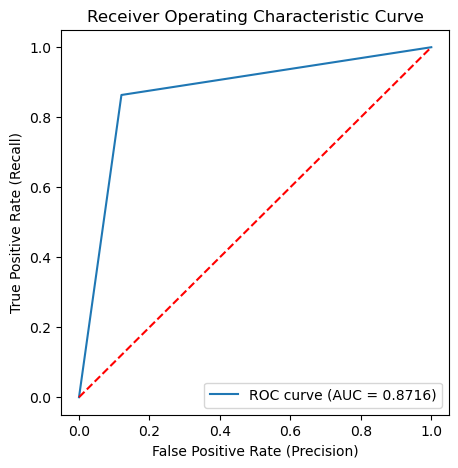

In [64]:
# Plot ROC curve for Random Forest classifier
y_pred=rf['y_test_pred']
plot_roc_curve(y_test, y_pred)

#### Cross- Validation & Hyperparameter Tuning

Fitting 3 folds for each of 54 candidates, totalling 162 fits
GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              max_leaf_nodes=10,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='accuracy', verbose=1)
Best parameters: {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}
Best score: 0.8757730131861354
Training set evaluation result :

Confusion Matrix: 
 [[28190  3824]
 [ 4226 27635]]
Accuracy:  0.873972602739726
Precision:  0.8784449601068057
Recall:  0.8673613508678322
F1 Score:  0.8728679722046747
roc_auc_score:  0.8739568046273939

-------------------------------

Test set evaluation result :

Confusion Matrix: 
 [

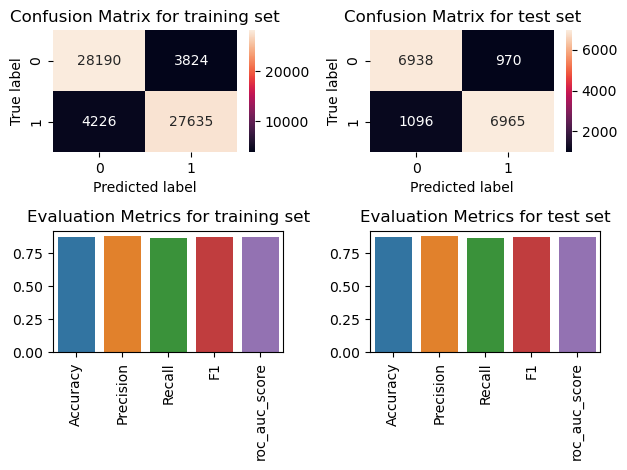

In [65]:
# Import Random Forest algoritham in envirnoment
from sklearn.ensemble import RandomForestClassifier

## Fitting Random Forest model to training set using cross validation

# Defining param_dict
param_grid = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
# Creating instance of Random Forest classifier
classifier_rf = RandomForestClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
# Fitting model
rf_cv=classification_CV_model(X_train, X_test, y_train, y_test, classifier_rf, param_grid)

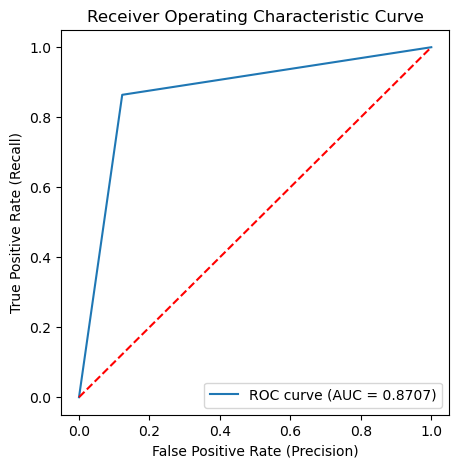

In [66]:
# Plot ROC curve for Random Forest classifier
y_pred=rf_cv['y_test_pred']
plot_roc_curve(y_test, y_pred)

#### Comparing Evaluation Metrics of Train/Test Split and Cross-Validation

+----+----------------------+--------------------+--------------------+
|    | Evaluation Metrics   |   Train/Test Split |   Cross-Validation |
+====+======================+====================+====================+
|  0 | Accuracy             |           0.871501 |           0.870624 |
+----+----------------------+--------------------+--------------------+
|  1 | Precision            |           0.879692 |           0.877757 |
+----+----------------------+--------------------+--------------------+
|  2 | Recall               |           0.863541 |           0.864037 |
+----+----------------------+--------------------+--------------------+
|  3 | F1-score             |           0.871541 |           0.870843 |
+----+----------------------+--------------------+--------------------+
|  4 | roc_auc_score        |           0.871578 |           0.870688 |
+----+----------------------+--------------------+--------------------+




<Figure size 700x700 with 0 Axes>

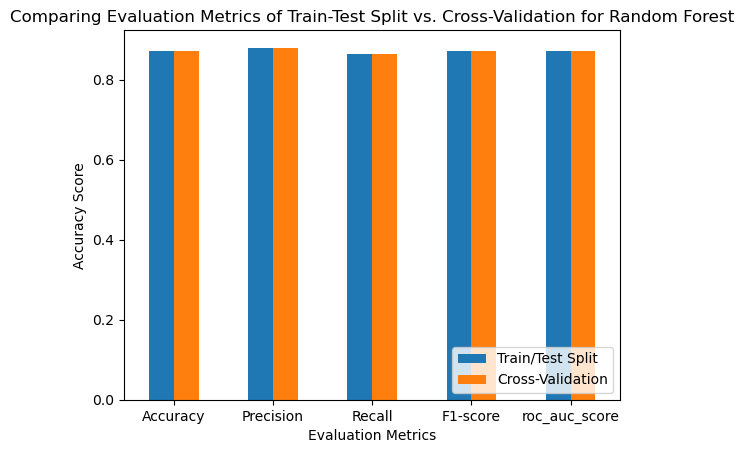

In [67]:
# Comparing evaluation metrics of train_test_split and GridSearchCV of Random Forest model

import pandas as pd
import matplotlib.pyplot as plt

# Data 
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
train_test_split = [rf['accuracy_test'],rf['precision_test'],rf['recall_test'],rf['f1_test'],rf['roc_auc_score_test']]
cross_validation = [rf_cv['accuracy_test'],rf_cv['precision_test'],rf_cv['recall_test'],rf_cv['f1_test'],rf_cv['roc_auc_score_test']]

# Create a dataframe
rf_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Train/Test Split': train_test_split,
                   'Cross-Validation': cross_validation})
# Print dataframe
print('=='*45)
print(tabulate(rf_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# Create a barplot
plt.figure(figsize=(7,7))
ax=rf_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of Train-Test Split vs. Cross-Validation for Random Forest")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.legend(loc="lower right")

# Show the plot
plt.show()
print('=='*45)

**<u>Observations</u> :**
- We saw slightly improvement in the model after training with cross-validation.
- Mejor improvement seen in reacall.
- We got 0.86 % of accuracy using train_test_split and 0.87 % of accuracy using cross validation in Random Forest model.

**END OF DOCUMENT**